In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
print(plt.style.available) 
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


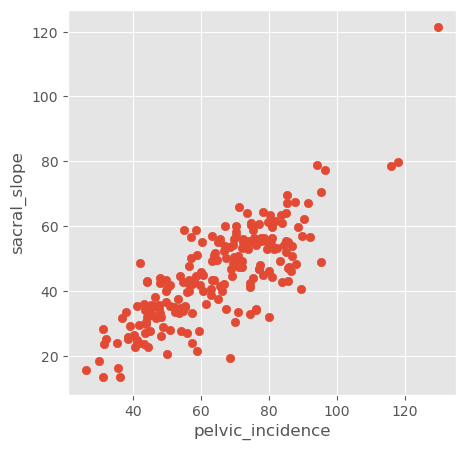

In [30]:
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

plt.figure(figsize=[5,5])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [31]:

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

R^2 score:  0.6458410481075871


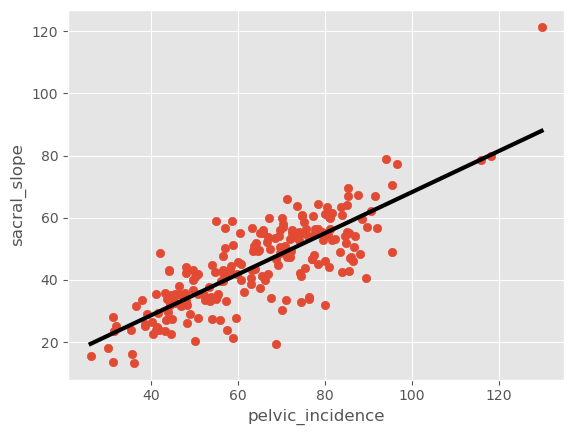

In [32]:

# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()



# **Multi regression**

In [65]:
x = data[["pelvic_radius", "sacral_slope", "pelvic_tilt numeric"]]
y= data["pelvic_incidence"]

In [66]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=100)



In [67]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [68]:
print("intercept:", mlr.intercept_)
print("coefficiants:")
list(zip(x,mlr.coef_))

intercept: 1.5765522221045103e-10
coefficiants:


[('pelvic_radius', 4.2352003332304275e-12),
 ('sacral_slope', 0.9999999999871662),
 ('pelvic_tilt numeric', 0.9999999999832055)]

In [69]:


y_pred = mlr.predict(x_test)
print("prediction for test set:{}".format(y_pred))


prediction for test set:[ 70.22145219  45.36675361  36.15782982  43.34960621  79.24967118
  86.472905    61.44659663  95.38259648  39.65690202  63.90063261
  40.68322911  43.58096394  49.82813487  80.11157156  39.35870531
  54.60031622  50.16007801  38.69791243  63.79242524  81.05661087
  77.40933293  51.52935759  49.78212054  92.02630795  44.25347644
  67.41253785  72.95564397  62.14080535  74.97602148  48.332638
  63.02630006  64.26150723  54.9509702   63.92947003  51.62467183
  33.04168754  66.50717865  58.82837872  54.75251965  67.289712
 118.1446548   74.85448007  56.10377352  53.94165809  44.48927475
  52.20469309  67.26314926  44.31890673  76.1472121   74.37767772
  53.91105429  74.56501543  70.67689818  61.82162718  88.0244989
  72.64385013  78.40125389  58.59952851  95.48022873  35.8775708
  45.54078988  48.06062649  39.05695098  42.51561014  49.70660953
  41.18776971  41.1716799   83.93300857  56.60577126  61.41173703
  41.72996308  68.72190982  46.44207842  48.10923638  50.9

In [70]:


mlr_dif = pd.DataFrame({"actual value: ":y_test,"predited value: ":y_pred})
mlr_dif.head()



,actual value:,predited value:
75,70.221452,70.221452
7,45.366754,45.366754
250,36.157830,36.157830
56,43.349606,43.349606
149,79.249671,79.249671


In [71]:


from sklearn import metrics
meansquare = metrics.mean_squared_error(y_test,y_pred)
print("r squared: {:.2f}".format(mlr.score(x,y)*100))
print("mse: ", meansquare)



r squared: 100.00
mse:  2.1837633030442342e-17


# **Polynomial **

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [74]:
x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 12, 40, 90, 172, 292, 454])

In [75]:
data.tail()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [76]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [81]:


abnormaldata1 = data[data['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"pelvic_tilt numeric"]).reshape(-1,1)



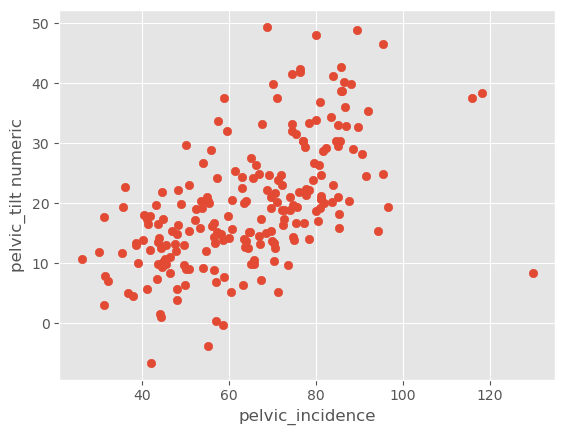

In [82]:
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('pelvic_tilt numeric')
plt.show()

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.3409325556134156


In [84]:


poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))



0.37910871102310306


In [86]:
X_new = np.linspace(0, 132, 200).reshape(200, 1)

X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

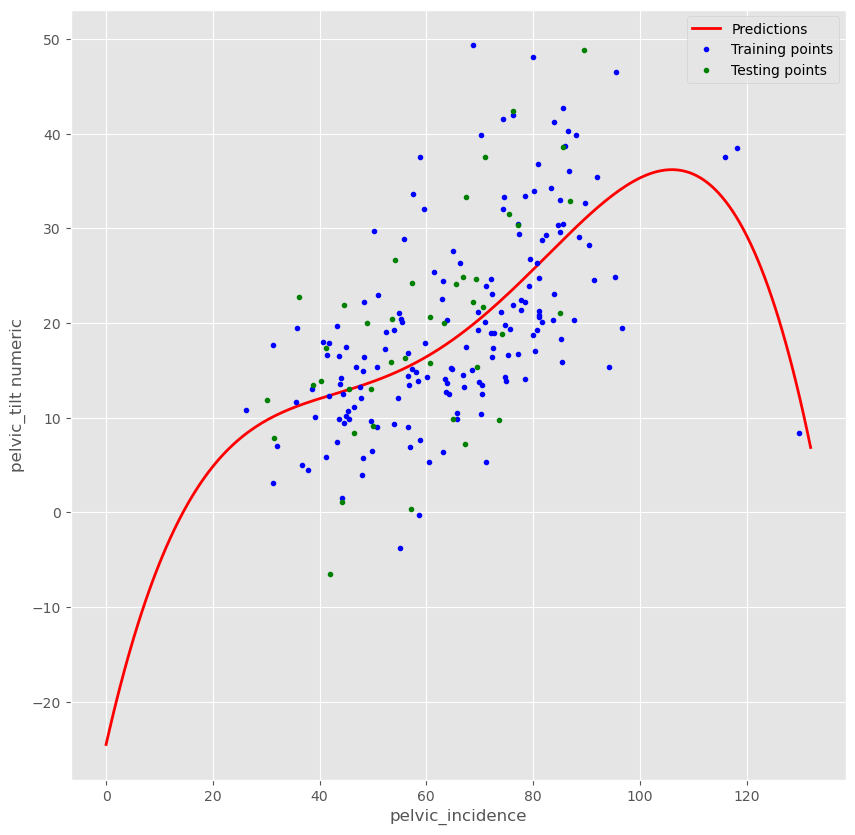

In [87]:


plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('pelvic_tilt numeric')
plt.legend()
plt.show()

